In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('5280.csv')

In [4]:
data.head()

,vin,fleet,positionid,vehicleid,gtpdriverid,version,heading,latitude,longitude,altitude,...,total_engine_hours,total_distance,time_sweetspot,time_idle,time_pto,time_drive,speed,msg_trigger_type,current_fuel_level,received_date
0,MC2M7SRC0JD055280,Syndicate_Carrier,1249553744,17421,NaN,0,0,21.618749,75.072453,495,...,2961.25,106275.96,1182.3,329.72,0,2630.75,0,IGNITION_ON,65.599998,14:53.2
1,MC2M7SRC0JD055280,Syndicate_Carrier,1249553745,17421,NaN,0,0,21.618749,75.072453,495,...,2961.25,106275.96,1182.3,329.72,0,2630.75,0,PERIODIC,65.599998,14:53.2
2,MC2M7SRC0JD055280,Syndicate_Carrier,1249553749,17421,NaN,0,331,21.618758,75.072438,489,...,2961.30,106275.96,1182.3,329.78,0,2630.75,1,PERIODIC,65.599998,14:53.3
3,MC2M7SRC0JD055280,Syndicate_Carrier,1249553751,17421,NaN,0,271,21.618806,75.072451,492,...,2961.30,106275.97,1182.3,329.79,0,2630.75,1,MOVEMENT,65.599998,14:53.3
4,MC2M7SRC0JD055280,Syndicate_Carrier,1249553743,17421,NaN,0,209,21.603059,75.068519,505,...,2961.40,106277.88,1182.3,329.79,0,2630.85,46,PERIODIC,65.599998,14:53.2


In [5]:
df = data[data['time_idle'] > 120] 

In [6]:
data1=df[['latitude','longitude','time_idle']]

In [7]:
data1.head()

,latitude,longitude,time_idle
0,21.618749,75.072453,329.72
1,21.618749,75.072453,329.72
2,21.618758,75.072438,329.78
3,21.618806,75.072451,329.79
4,21.603059,75.068519,329.79


In [8]:
x = data1.iloc[:,2:3]

In [9]:
x

,time_idle
0,329.72
1,329.72
2,329.78
3,329.79
4,329.79
5,329.79
6,329.79
7,329.79
8,329.79
9,329.79


In [10]:
kmeans = KMeans(4)

In [11]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
data_with_clusters = data1.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,latitude,longitude,time_idle,Cluster
0,21.618749,75.072453,329.72,1
1,21.618749,75.072453,329.72,1
2,21.618758,75.072438,329.78,1
3,21.618806,75.072451,329.79,1
4,21.603059,75.068519,329.79,1
5,21.580766,75.057916,329.79,1
6,21.566225,75.052146,329.79,1
7,21.566225,75.052146,329.79,1
8,21.524043,75.042925,329.79,1
9,21.501679,75.017705,329.79,1


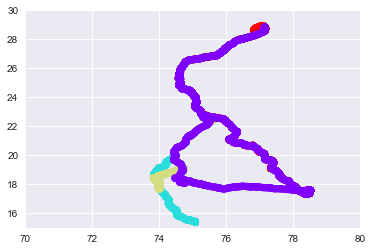

In [14]:
plt.scatter(data_with_clusters['longitude'],data_with_clusters['latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(70,80)
plt.ylim(15,30)
plt.show()